# Data Augmentation(Flower Image Classification)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import  Sequential

import pathlib

# Data(Images)

In [20]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='Data/', untar=True)

228813984/228813984 [==============================] - 18s 0us/step


In [21]:
data_dir

'Data/datasets/flower_photos'

In [22]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('Data/datasets/flower_photos')

In [23]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('Data/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [24]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [25]:
roses = list(data_dir.glob('roses/*'))
tulips = list(data_dir.glob('tulips/*'))
roses[:5]

[PosixPath('Data/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

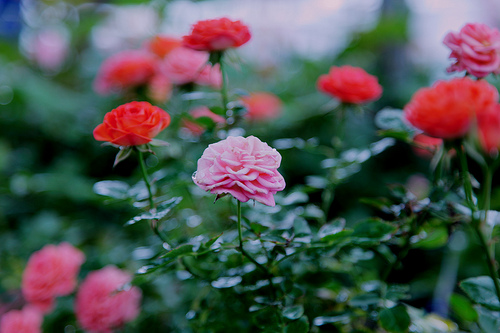

In [26]:
PIL.Image.open(str(roses[1]))

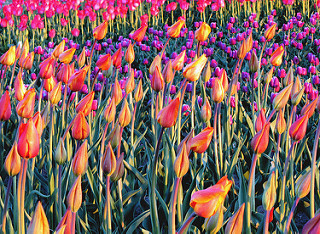

In [27]:
PIL.Image.open(str(tulips[0]))

# Create a python dictionary to store flower types and their directory location

In [28]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [29]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [30]:
flowers_images_dict['roses'][:5]

[PosixPath('Data/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('Data/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [31]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

OpenCV read the above image and converted it into a numpy 3D array: (x,y,RGB)

In [32]:
img.shape

(243, 500, 3)

## Resize the images to a common size

In [33]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [34]:
X = np.array(X)
y = np.array(y)

In [35]:
X[0]

array([[[  2,   0,   2],
        [ 10,   5,   1],
        [ 89,  85,  97],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[ 14,  33,  73],
        [  6,   1,   2],
        [ 92,  90, 105],
        ...,
        [243, 244, 242],
        [244, 245, 243],
        [243, 244, 242]],

       [[122, 176, 224],
        [ 10,   1,   2],
        [ 72,  80,  84],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[147, 109,  85],
        [145, 109,  85],
        [144, 108,  84],
        ...,
        [155, 122,  96],
        [152, 121,  95],
        [149, 118,  93]],

       [[148, 114,  91],
        [154, 120,  96],
        [146, 112,  88],
        ...,
        [155, 125,  98],
        [153, 121,  95],
        [152, 122,  93]],

       [[153, 119,  96],
        [151, 117,  93],
        [152, 117,  94],
        ...,
        [154, 124,  97],
        [153, 121,  95],
        [153, 123,  94]]

In [36]:
pd.value_counts(y)

2    898
4    799
3    699
0    641
1    633
dtype: int64

# Scale the Image data

In [37]:
X = X / 255
X[0]

array([[[0.00784314, 0.        , 0.00784314],
        [0.03921569, 0.01960784, 0.00392157],
        [0.34901961, 0.33333333, 0.38039216],
        ...,
        [0.95686275, 0.96078431, 0.95294118],
        [0.95686275, 0.96078431, 0.95294118],
        [0.95686275, 0.96078431, 0.95294118]],

       [[0.05490196, 0.12941176, 0.28627451],
        [0.02352941, 0.00392157, 0.00784314],
        [0.36078431, 0.35294118, 0.41176471],
        ...,
        [0.95294118, 0.95686275, 0.94901961],
        [0.95686275, 0.96078431, 0.95294118],
        [0.95294118, 0.95686275, 0.94901961]],

       [[0.47843137, 0.69019608, 0.87843137],
        [0.03921569, 0.00392157, 0.00784314],
        [0.28235294, 0.31372549, 0.32941176],
        ...,
        [0.95686275, 0.96078431, 0.95294118],
        [0.95686275, 0.96078431, 0.95294118],
        [0.95686275, 0.96078431, 0.95294118]],

       ...,

       [[0.57647059, 0.42745098, 0.33333333],
        [0.56862745, 0.42745098, 0.33333333],
        [0.56470588, 0

# Train/Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((2752, 180, 180, 3), (918, 180, 180, 3))

# Convolutional Neural Network(CNN)

In [39]:
num_classes = 5

model = Sequential([
    # Convolution
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    # Artificial Neural Network
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes) # by default it will use a linear activation
])

model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=30)

Metal device set to: Apple M1 Pro


2023-03-22 12:39:44.648510: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-22 12:39:44.648564: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-22 12:39:47.198888: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2023-03-22 12:39:47.872770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 4s 36ms/step - loss: 1.4007 - accuracy: 0.4241
Epoch 2/30
86/86 [==============================] - 3s 35ms/step - loss: 1.0831 - accuracy: 0.5749
Epoch 3/30
86/86 [==============================] - 3s 35ms/step - loss: 0.9016 - accuracy: 0.6581
Epoch 4/30
86/86 [==============================] - 3s 36ms/step - loss: 0.7156 - accuracy: 0.7507
Epoch 5/30
86/86 [==============================] - 3s 35ms/step - loss: 0.5245 - accuracy: 0.8100
Epoch 6/30
86/86 [==============================] - 3s 36ms/step - loss: 0.2971 - accuracy: 0.9033
Epoch 7/30
86/86 [==============================] - 3s 34ms/step - loss: 0.1756 - accuracy: 0.9455
Epoch 8/30
86/86 [==============================] - 3s 35ms/step - loss: 0.0886 - accuracy: 0.9764
Epoch 9/30
86/86 [==============================] - 3s 33ms/step - loss: 0.0675 - accuracy: 0.9844
Epoch 10/30
86/86 [==============================] - 3s 34ms/step - loss: 0.0418 - accuracy: 0.9913
Epoch 11/30
86/86 [=

Accuracy for training set is high at 1

In [40]:
model.evaluate(X_test, y_test)

 1/29 [>.............................] - ETA: 9s - loss: 3.0540 - accuracy: 0.5938

2023-03-22 12:41:19.873080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 18ms/step - loss: 3.0382 - accuracy: 0.6351


[3.038186550140381, 0.6350762248039246]

However, accuracy for training set is low at 0.63. Thus the model is overfit

# Predictions

In [41]:
predictions = model.predict(X_test)
predictions

2023-03-22 12:41:20.931290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ -4.287729  ,   8.511239  ,   2.9864295 , -16.211697  ,
         -8.310422  ],
       [ 11.1818905 ,   5.467323  , -10.249329  , -10.027641  ,
         -0.56526077],
       [  1.9780344 , -16.20893   ,  12.615911  ,   0.7122271 ,
        -12.989083  ],
       ...,
       [-13.266358  ,  -2.6184402 ,  -0.7364795 ,   7.54989   ,
         -1.3494896 ],
       [  6.2541165 ,  -1.4879948 ,  -7.8977737 ,  -5.3032565 ,
          7.14618   ],
       [ -8.108892  , -19.963606  ,  -5.3394036 ,  27.562578  ,
         -3.0332863 ]], dtype=float32)

Since we did not specify an activation function, CNN used a linear function thus we received the values above

We will convert the above into probabilities using a softMax function

In [42]:
prob_score = tf.nn.softmax(predictions[0])
prob_score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.7526448e-06, 9.9602640e-01, 3.9707846e-03, 1.8248892e-11,
       4.9285198e-08], dtype=float32)>

We will use an argmax function to convert the probabilities into 1 and 0s

In [43]:
np.argmax(prob_score)

1

In [44]:
y_test[0]

1

# Addressing overfitting

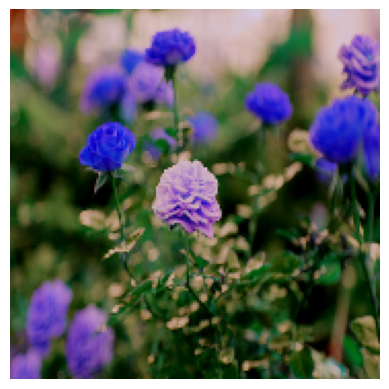

In [45]:
plt.axis("off")
plt.imshow(X[1])

In [46]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
])

# CNN with Augmented Image Data

In [48]:
num_classes = 5

model = Sequential([
    data_augmentation, # Added augmentation layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # Added Dropout layer to prevent overfitting
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-03-22 12:42:57.799640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 47s 479ms/step - loss: 1.3467 - accuracy: 0.4157
Epoch 2/10
86/86 [==============================] - 40s 462ms/step - loss: 1.0631 - accuracy: 0.5585
Epoch 3/10
86/86 [==============================] - 41s 474ms/step - loss: 0.9412 - accuracy: 0.6370
Epoch 4/10
86/86 [==============================] - 40s 470ms/step - loss: 0.8717 - accuracy: 0.6548
Epoch 5/10
86/86 [==============================] - 40s 467ms/step - loss: 0.8106 - accuracy: 0.6977
Epoch 6/10
86/86 [==============================] - 41s 472ms/step - loss: 0.7629 - accuracy: 0.7151
Epoch 7/10
86/86 [==============================] - 40s 461ms/step - loss: 0.7251 - accuracy: 0.7253
Epoch 8/10
86/86 [==============================] - 39s 459ms/step - loss: 0.6786 - accuracy: 0.7460
Epoch 9/10
86/86 [==============================] - 40s 462ms/step - loss: 0.6192 - accuracy: 0.7696
Epoch 10/10
86/86 [==============================] - 42s 489ms/step - loss: 0.5923 - accuracy: 0.7664


In [49]:
model.evaluate(X_test, y_test)

2023-03-22 12:49:50.866683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 35ms/step - loss: 0.8665 - accuracy: 0.6699


[0.8665114641189575, 0.6699346303939819]

The augmented data model performed better with a accuracy of 0.66 compared to 0.63. I ran fewer epochs due to time contraint: 10 vs 30